Практическое домашнее задание к семинару от 06-02-2024:

Надо сделать хотя бы одно задание:
1. Нарисуйте сами в Paint цифру пером и подайте на вход вашей нейронной сети. Для работы с рисунками можно использовать Pillow.
2. По желанию - обучите нейронную сеть от SKLEARN и потестируйте.

In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


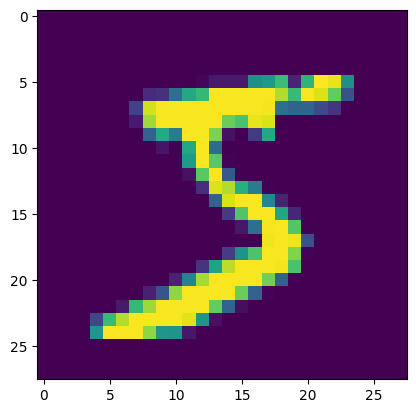

In [9]:
plt.imshow(x_train[0])

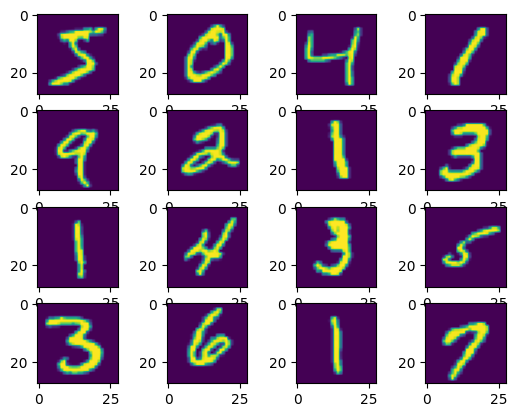

In [10]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [11]:
input_shape = (28, 28, 1)

In [12]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [13]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1526
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1526
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1526
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1526
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1526
CPU times: user 25.2 s, sys: 1.04 s, total: 26.2 s
Wall time: 41.8 s


In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [19]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [20]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
%%time

history =  model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.9093
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1587 - accuracy: 0.9540
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1171 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9720
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0787 - accuracy: 0.9764
CPU times: user 24.9 s, sys: 1.98 s, total: 26.9 s
Wall time: 42.7 s


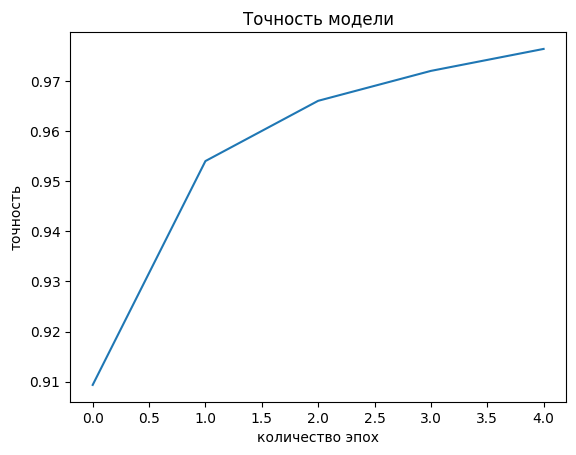

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

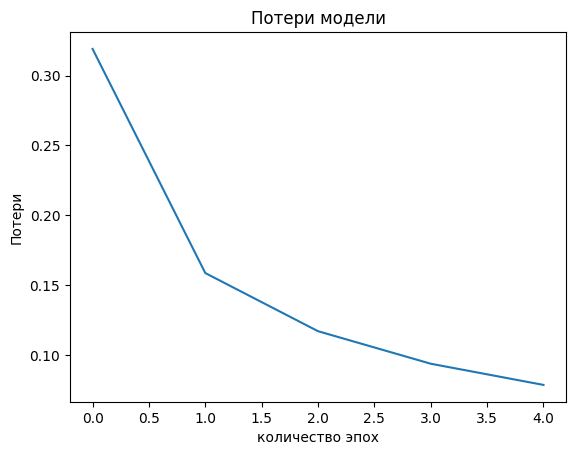

In [23]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [24]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9678


[0.1037604883313179, 0.9678000211715698]

In [25]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0918 - val_accuracy: 0.9715
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0999 - val_accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0911 - val_accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0857 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0926 - val_accuracy: 0.9740
CPU times: user 27.3 s, sys: 1.57 s, total: 28.9 s
Wall time: 41.4 s


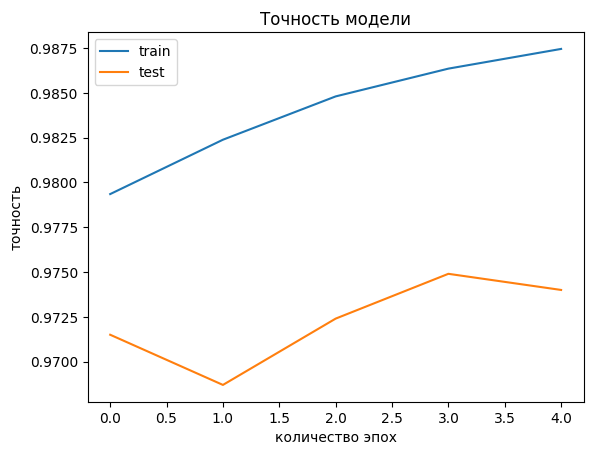

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

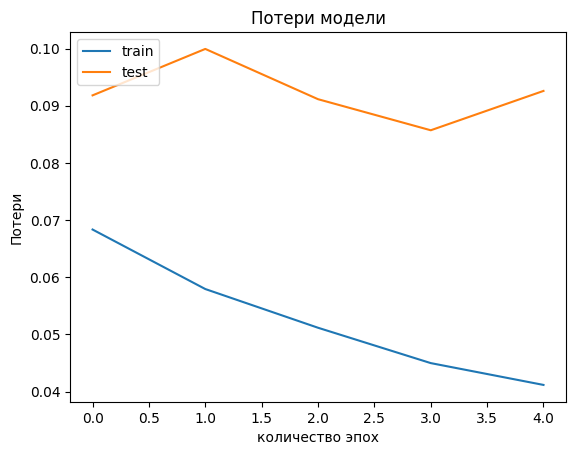

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Часть 1: Нарисуйте сами в Paint цифру пером и подайте на вход вашей нейронной сети. Для работы с рисунками можно использовать Pillow.

Для решения данной задачи я нарисовал 10 рукописных цифр от 0 до 9, чтобы подать на вход самой лучшей модели, полученной на семинаре, а именно - model2.

In [79]:
from keras.preprocessing import image

In [80]:
### загрузка изображений рукописных цифр

image_paths = ['/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/0.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/1.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/2.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/3.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/4.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/5.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/6.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/7.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/8.jpg',
               '/content/drive/MyDrive/Colab Notebooks/GeekBrains_seminar_06-02-2024/Рукописные цифры/9.jpg'
               ]
captions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
### функция для подготовки изображений
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), grayscale=True)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = 1 - (img / 255.0)  # нормализация изображения + инвертирование темных/светлых цветов (т.к. в MNIST светлые цифры на темном фоне,
    ### а в моих изображениях темные цифры на светлом фоне)
    return img.round() ### округление интенсивностей пикселей до 0 или 1, чтобы придать большую контрастность

In [86]:
### функция для распознавания изображения цифр
def predict_digit(keras_model, img_path):
    img = preprocess_image(img_path)
    prediction = keras_model.predict(img)
    digit = np.argmax(prediction)
    return digit

In [88]:
for i in range(10):
  predicted_digit = predict_digit(model_2, image_paths[i])
  print('Поданная на вход цифра:', captions[i])
  print('Предсказанная цифра:', predicted_digit)

1/1 [==============================] - 0s 21ms/step
Поданная на вход цифра: 0
Предсказанная цифра: 3
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 1
Предсказанная цифра: 7
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 2
Предсказанная цифра: 5
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 3
Предсказанная цифра: 3
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 4
Предсказанная цифра: 7
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 5
Предсказанная цифра: 6
1/1 [==============================] - 0s 21ms/step
Поданная на вход цифра: 6
Предсказанная цифра: 5
1/1 [==============================] - 0s 21ms/step
Поданная на вход цифра: 7
Предсказанная цифра: 7
1/1 [==============================] - 0s 20ms/step
Поданная на вход цифра: 8
Предсказанная цифра: 5
1/1 [==============================] - 0s 33ms/step
Поданная на вход цифра: 9
Предсказанная

Вывод: модель разпознает только 2-е цифры из 10-ти, что можно объяснить непохожестью моего подчерка на подчерк англоязычных пользователей, на основании которого создавался набор данных MNIST. Также можно заметить, что модель делает ошибки в похожих парах цифр: 0 и 3; 1 и 7; 2 и 5 и т.д.